# Formaterer Dataen som i Del 1

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from funksjoner import Del1, Del2


filnavn = '../data/table.csv'
time = "Tid(norsk normaltid)"
vind = "Høyeste vindkast (1 t)"
temp = "Lufttemperatur"

del1 = Del1(filnavn)
data = del1.load_data()
data = del1.clean_data()
data = del1.convert_to_datetime(time)
data = del1.convert_to_numerical(vind)
data = del1.convert_to_numerical(temp)



# Dataanalyse

In [3]:
del2 = Del2(data)


# Printe ut statistiske verdier for vindkast
print('\n', "Statistiske verdier for vindkast")
del2.compute_mean(vind)
del2.compute_median(vind)
del2.compute_stdv(vind)
print()
print("Enkel analyse av vindkast:")
del2.simple_analysis(vind)

# Printe ut statistiske verdier for temperatur

print('\n', "Statistiske verdier for vindkast")
del2.compute_mean(temp)
del2.compute_median(temp)
del2.compute_stdv(temp)
print()
print("Enkel analyse av temperatur:")
del2.simple_analysis(temp)



 Statistiske verdier for vindkast
Gjennomsnitt for 'Høyeste vindkast (1 t)': 11.29
Median for 'Høyeste vindkast (1 t)': 10.50
Varians for 'Høyeste vindkast (1 t)': 5.78

Enkel analyse av vindkast:

 Statistiske verdier for vindkast
Gjennomsnitt for 'Lufttemperatur': 3.79
Median for 'Lufttemperatur': 3.00
Varians for 'Lufttemperatur': 7.03

Enkel analyse av temperatur:


# Visualisering

Først vanlig visualisering av dataene

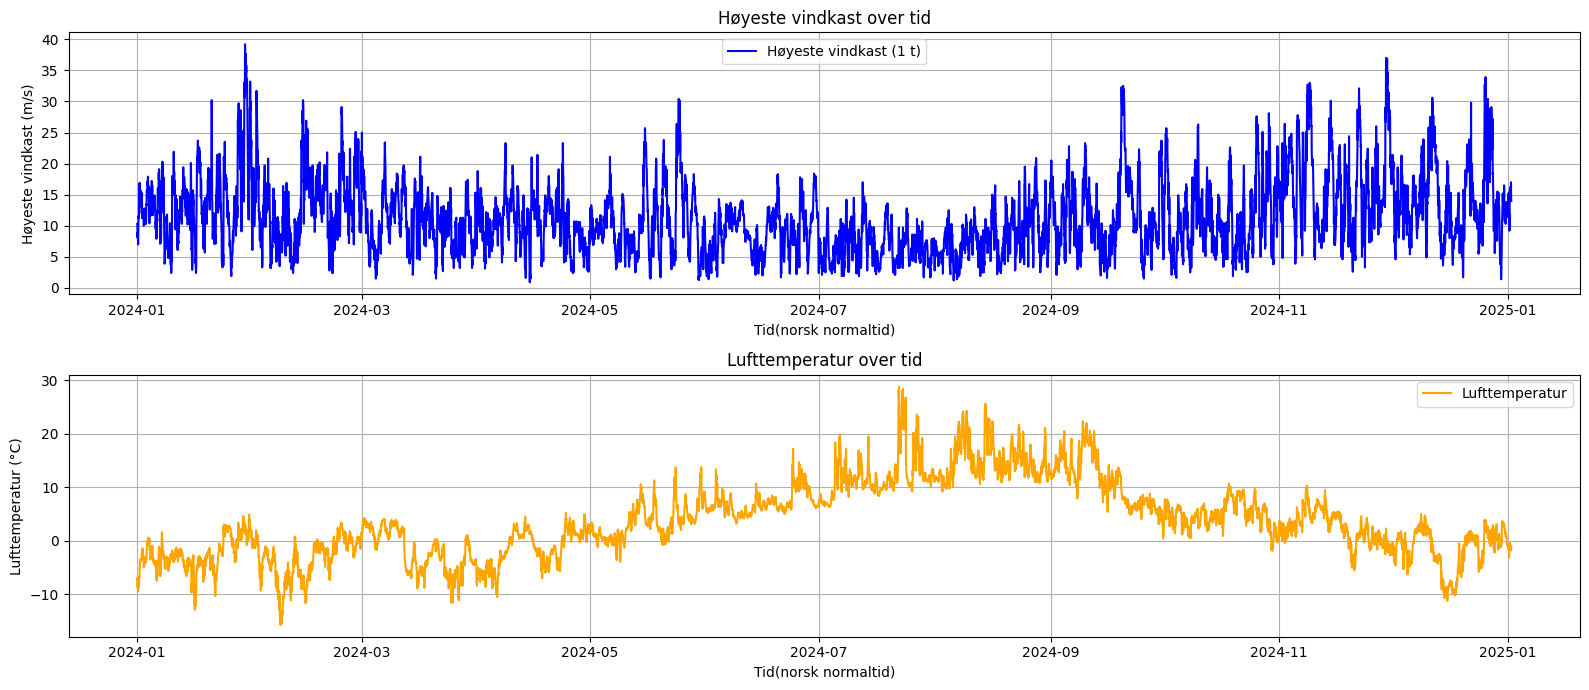

In [4]:
#Plotting "Høyeste vindkast (1 t)" og "Lufttemperatur" over tid
plt.figure(figsize=(16, 7))

#Plot for "Høyeste vindkast (1 t)"
plt.subplot(2, 1, 1)
plt.plot(data[time], data[vind], label= vind, color="blue")
plt.title( "Høyeste vindkast over tid")
plt.xlabel(time)
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plot for "Lufttemperatur"
plt.subplot(2, 1, 2)
plt.plot(data[time], data[temp], label= temp, color="orange")
plt.title("Lufttemperatur over tid")
plt.xlabel(time)
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Boxplot med bruk av seaborn

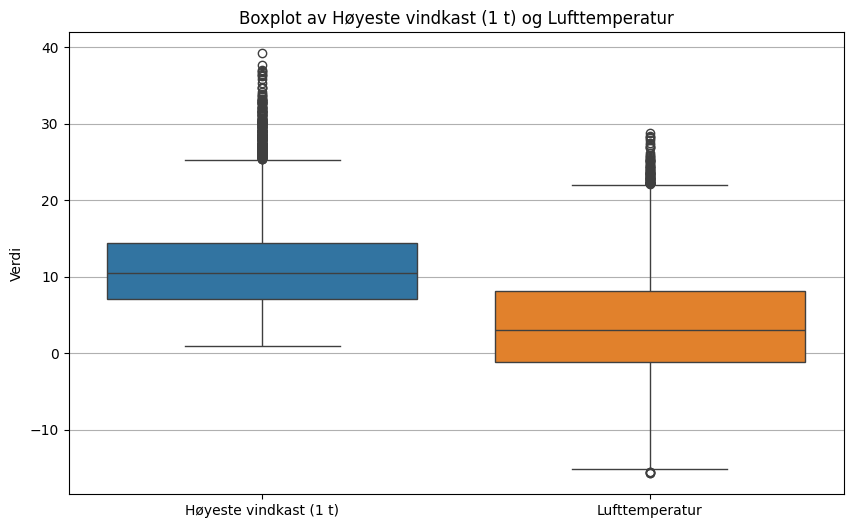

In [5]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[[vind, temp]])
plt.title("Boxplot av Høyeste vindkast (1 t) og Lufttemperatur")
plt.ylabel("Verdi")
plt.grid(axis="y")
plt.show()

### Histogram

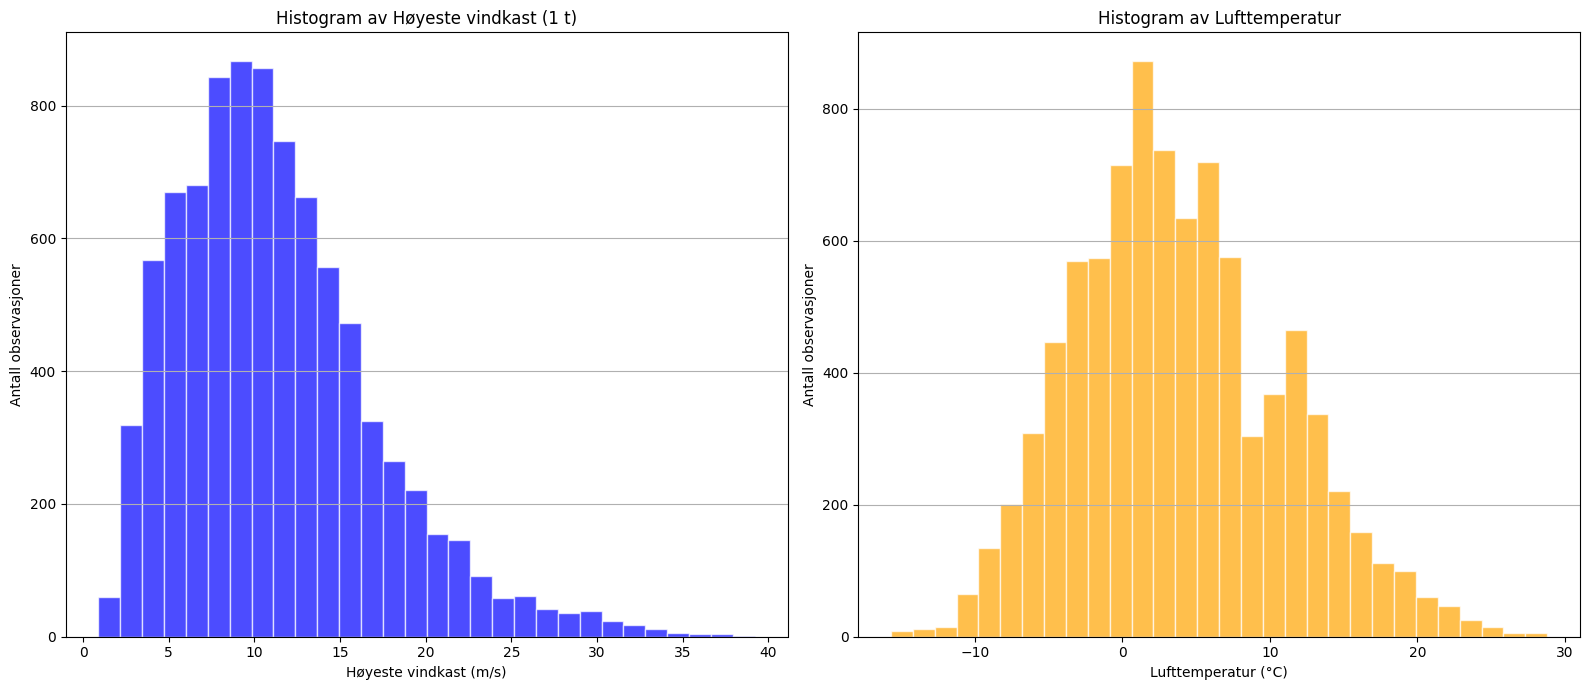

In [6]:
vind_hist = del2.data[vind]
temp_hist = del2.data[temp]

# Plotting av histogrammene
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.hist(vind_hist, bins=30, color="blue", alpha=0.7, edgecolor="white")
plt.title("Histogram av Høyeste vindkast (1 t)")
plt.xlabel("Høyeste vindkast (m/s)")
plt.ylabel("Antall observasjoner")
plt.grid(axis="y")

plt.subplot(1, 2, 2)
plt.hist(temp_hist, bins=30, color="orange", alpha=0.7, edgecolor="white")
plt.title("Histogram av Lufttemperatur")
plt.xlabel("Lufttemperatur (°C)")
plt.ylabel("Antall observasjoner")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


### Moving Average

Tar i bruk moving average for å håndtere manglende data og eventuelle uteliggere i datasettet. Samtidig vil det glatte ut kurvene.

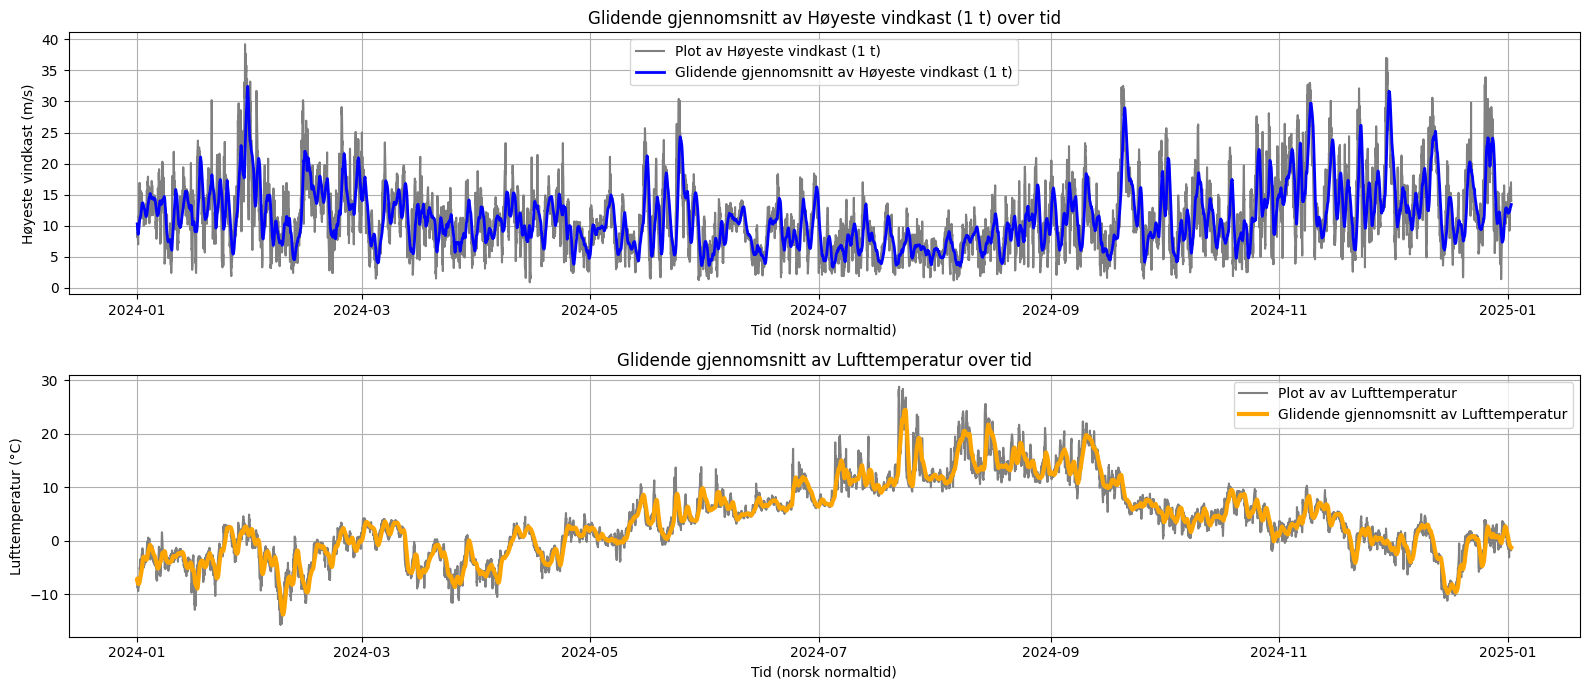

In [21]:
window_size = 24

mv_vind = del2.moving_average(vind, window_size)
mv_temp = del2.moving_average(temp, window_size)

# Plotting glidende gjennomsnitt
plt.figure(figsize=(16, 7))
plt.subplot(2, 1, 1)
plt.plot(data[time], data[vind], label="Plot av Høyeste vindkast (1 t)", color="grey")
plt.plot(data[time], mv_vind, label="Glidende gjennomsnitt av Høyeste vindkast (1 t)", color="blue", linewidth=2)
plt.title("Glidende gjennomsnitt av Høyeste vindkast (1 t) over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plotting glidende gjennomsnitt for lufttemperatur 
plt.subplot(2, 1, 2)
plt.plot(data[time], data[temp], label="Plot av av Lufttemperatur", color="grey")
plt.plot(data[time], mv_temp, label="Glidende gjennomsnitt av Lufttemperatur", color="orange", linewidth=3)
plt.title("Glidende gjennomsnitt av Lufttemperatur over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Korrelasjon mellom vindkast og temperatur

Korrelasjon mellom 'Høyeste vindkast (1 t)' og 'Lufttemperatur' (pearson): -0.18
Korrelasjon mellom 'Høyeste vindkast (1 t)' og 'Lufttemperatur' (spearman): -0.18
Korrelasjon mellom 'Høyeste vindkast (1 t)' og 'Lufttemperatur' (kendall): -0.18


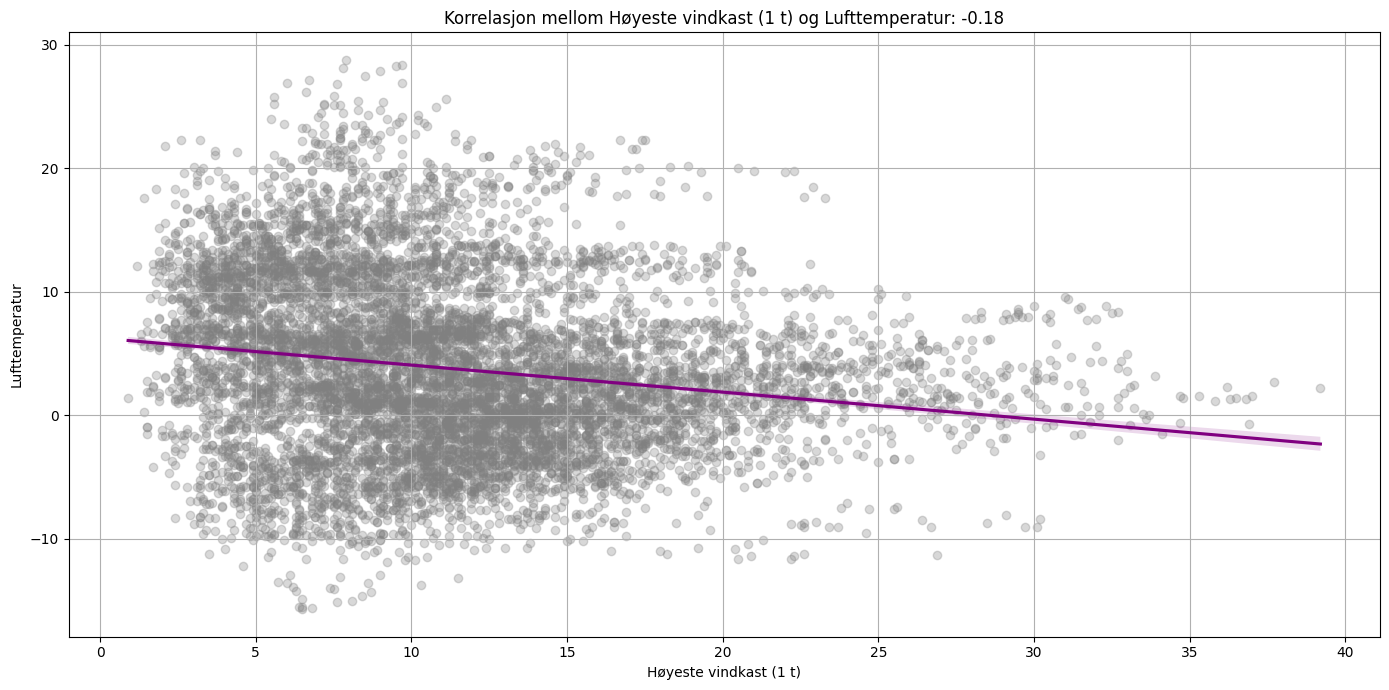

In [8]:
# Regne ut korrelasjon mellom vindkast og temperatur
korr_pearson = del2.correlation_analysis(vind, temp)
korr_spearman = del2.correlation_analysis(vind, temp, method='spearman')
korr_kendall = del2.correlation_analysis(vind, temp, method='kendall')


# Plotting av korrelasjonsmatrise
plt.figure(figsize=(14, 7))
sns.regplot(x=data[vind], y=data[temp], color="purple", marker="o", scatter_kws={'alpha':0.3, 'color':'grey'})
plt.title(f"Korrelasjon mellom {vind} og {temp}: {korr_pearson:.2f}")
plt.xlabel(vind)
plt.ylabel(temp)
plt.grid(True)
plt.tight_layout()
plt.show()

### Interaktiv modell



In [9]:
import plotly.graph_objects as go

fig_vind = go.Figure()

# Legg til dataserien
fig_vind.add_trace(go.Scatter(
    x=data[time],
    y=data[vind],
    mode='lines',
    name='Høyeste vindkast (1 t)',
    line=dict(color='blue')
))

# Oppdater layout med range-slider
fig_vind.update_layout(
    title='Høyeste vindkast (1 t) over tid',
    xaxis_title='Tid (norsk normaltid)',
    yaxis_title='Høyeste vindkast (m/s)',
    xaxis=dict(rangeslider=dict(visible=True)),
    template="plotly_white"
)

# Lage undermappe
mappenavn = "../src/plot_html"
if not os.path.exists(mappenavn):
    os.makedirs(mappenavn, exist_ok=True)

# Lage filnavnet for html filen med full sti
filename_vind = "plotly_vindkast.html"
html_path_vind = os.path.join(mappenavn, filename_vind)

# Lager html filen
fig_vind.write_html(html_path_vind)

# Gjør samme for lufttemperatur
fig_temp = go.Figure()

# Legg til dataserien
fig_temp.add_trace(go.Scatter(
    x=data[time],
    y=data["Lufttemperatur"],
    mode='lines',
    name='Lufttemperatur',
    line=dict(color='orange')
))

# Oppdater layout med range-slider
fig_temp.update_layout(
    title='Lufttemperatur over tid',
    xaxis_title='Tid (norsk normaltid)',
    yaxis_title='Lufttemperatur (°C)',
    xaxis=dict(rangeslider=dict(visible=True)),
    template="plotly_white"
)

# Lagre filnavnet for html filen med full sti
filename_temp = "plotly_lufttemp.html"
html_path_temp = os.path.join(mappenavn, filename_temp)

# Lager html filen
fig_temp.write_html(html_path_temp)

### Kjør for å åpne den interaktive modellen

In [10]:
import webbrowser
# Åpne HTML-filene i nettleseren
#webbrowser.open(html_path_vind)
#webbrowser.open(html_path_temp)

# Prediktiv Analyse

In [11]:
# Trener lineær regresjon for vindkast og temperatur
reg_vind, start_tid_vind = del2.train_linear_regression(vind)
reg_temp, start_tid_temp = del2.train_linear_regression(temp)

# Printer Parametrene
print("Vindmodell:", reg_vind.intercept_, reg_vind.coef_)
print("Temperaturmodell:", reg_temp.intercept_, reg_temp.coef_) 


Vindmodell: 10.532077032108088 [0.00017168]
Temperaturmodell: -0.62684664010437 [0.00100353]


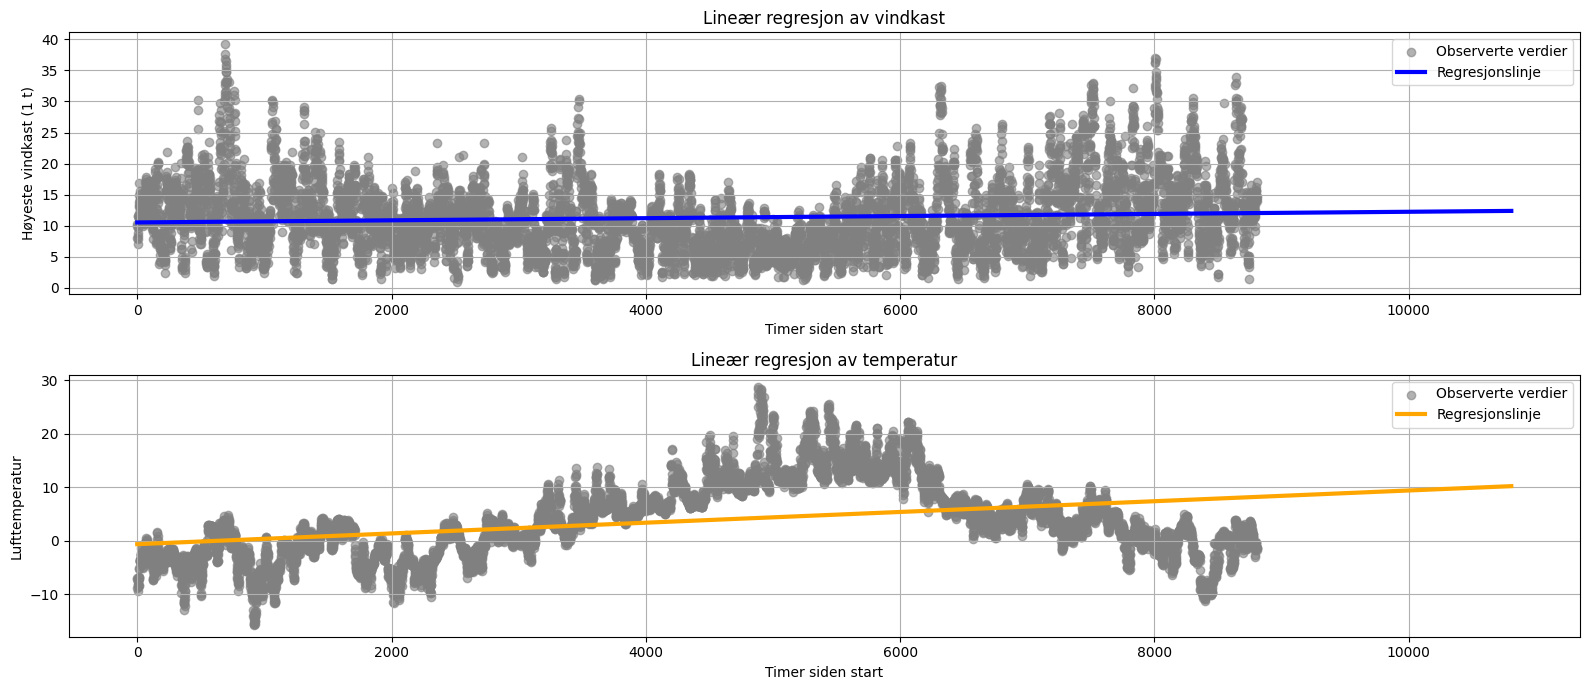

In [12]:
x = del2.data["medgått_tid"]
y = [del2.data[vind], del2.data[temp]]

# Predikering av verdier utover dataene
x_extended = np.linspace(x.min(), x.max() + 2000, 1000)
y_predicted_vind = del2.predict(reg_vind, x_extended)
y_predicted_temp = del2.predict(reg_temp, x_extended)


plt.figure(figsize=(16, 7))

#Plot for Høyeste vindkast 
plt.subplot(2, 1, 1)
plt.scatter(x, y[0], label="Observerte verdier", alpha= 0.6, color="grey")
plt.plot(x_extended, y_predicted_vind, color="blue", label="Regresjonslinje", linewidth=3)
plt.title("Lineær regresjon av vindkast")
plt.xlabel("Timer siden start")
plt.ylabel(vind)
plt.legend()
plt.grid(True)

# Plot for Lufttemperatur
plt.subplot(2, 1, 2)
plt.scatter(x, y[1], label="Observerte verdier", alpha=0.6, color="grey")
plt.plot(x_extended, y_predicted_temp, color="orange", label="Regresjonslinje", linewidth=3)
plt.title("Lineær regresjon av temperatur")
plt.xlabel("Timer siden start")
plt.ylabel(temp)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

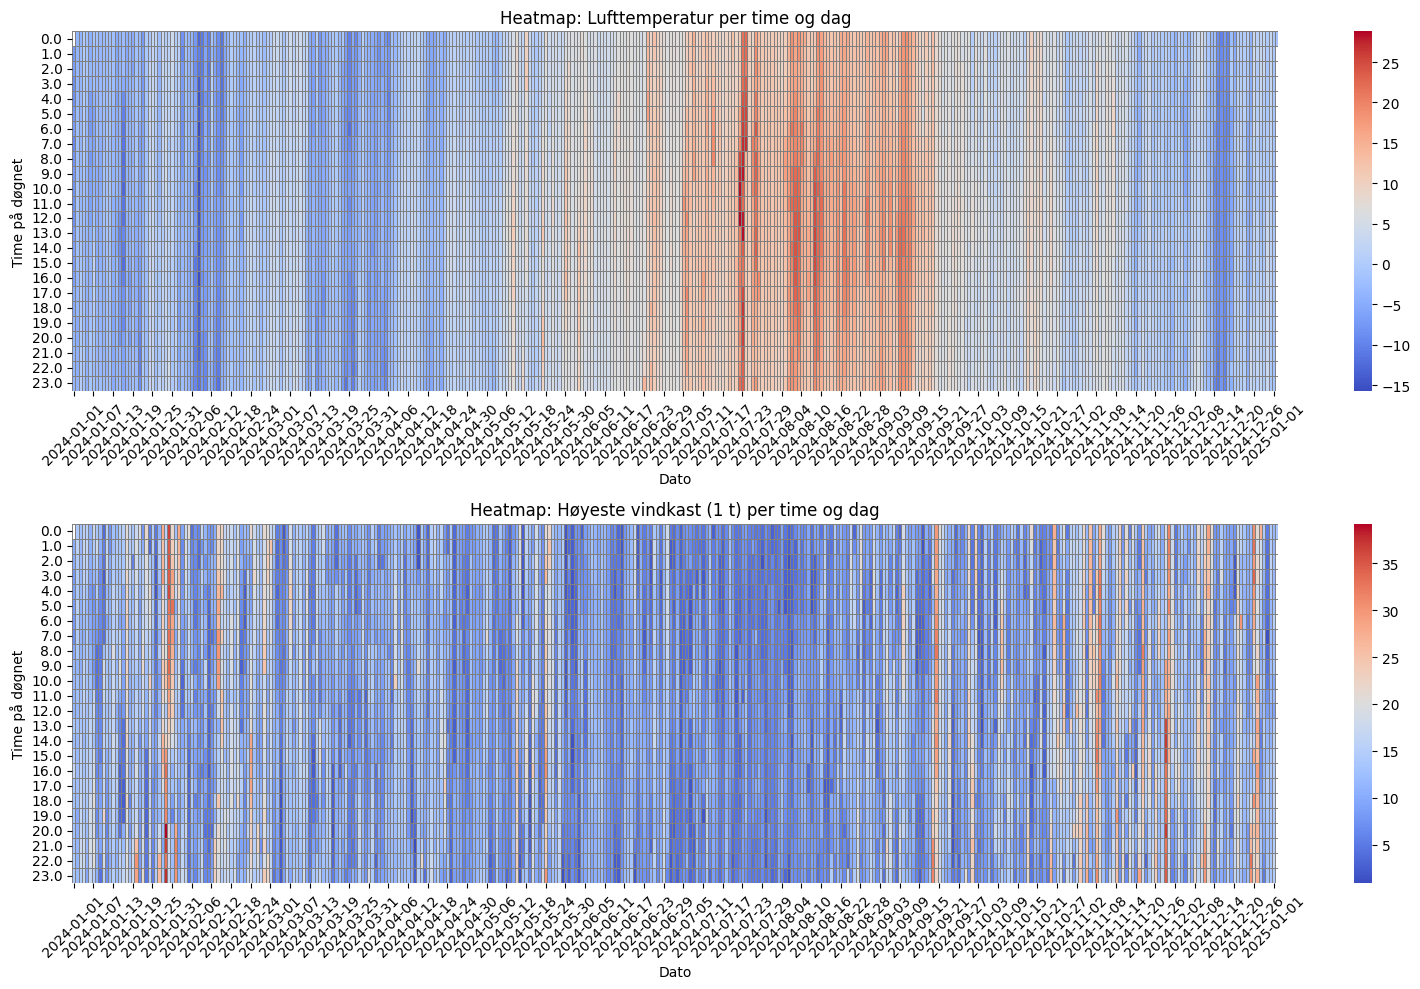

In [13]:

# Klargjøring av data for pivot-tabell
data["Dato"] = data[time].dt.date
data["Time"] = data[time].dt.hour

# Beregn gjennomsnitt per time per dag
pivot_temp = data.pivot_table(index="Time", columns="Dato", values="Lufttemperatur", aggfunc="mean")
pivot_vind = data.pivot_table(index="Time", columns="Dato", values="Høyeste vindkast (1 t)", aggfunc="mean")

# Plotte temperatur heatmap
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
sns.heatmap(pivot_temp, cmap="coolwarm", annot=False, linewidths=0.5, linecolor='gray')
plt.title("Heatmap: Lufttemperatur per time og dag")
plt.xlabel("Dato")
plt.ylabel("Time på døgnet")
plt.xticks(rotation=45)

# Plot vindkast heatmap
plt.subplot(2, 1, 2)
sns.heatmap(pivot_vind, cmap="coolwarm", annot=False, linewidths=0.5, linecolor='gray')
plt.title("Heatmap: Høyeste vindkast (1 t) per time og dag")
plt.xlabel("Dato")
plt.ylabel("Time på døgnet")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [14]:

missing_data = del2.create_missing_values(cols= [vind, temp])


print("Manglende data:", missing_data.isnull().sum())



Manglende data: Navn                                    0
Stasjon                                 1
Tid(norsk normaltid)                    1
Høyeste vindkast (1 t)               1762
Lufttemperatur                       1762
Høyeste vindkast (1 t)_moving_avg       0
Lufttemperatur_moving_avg               0
medgått_tid                             1
dtype: int64


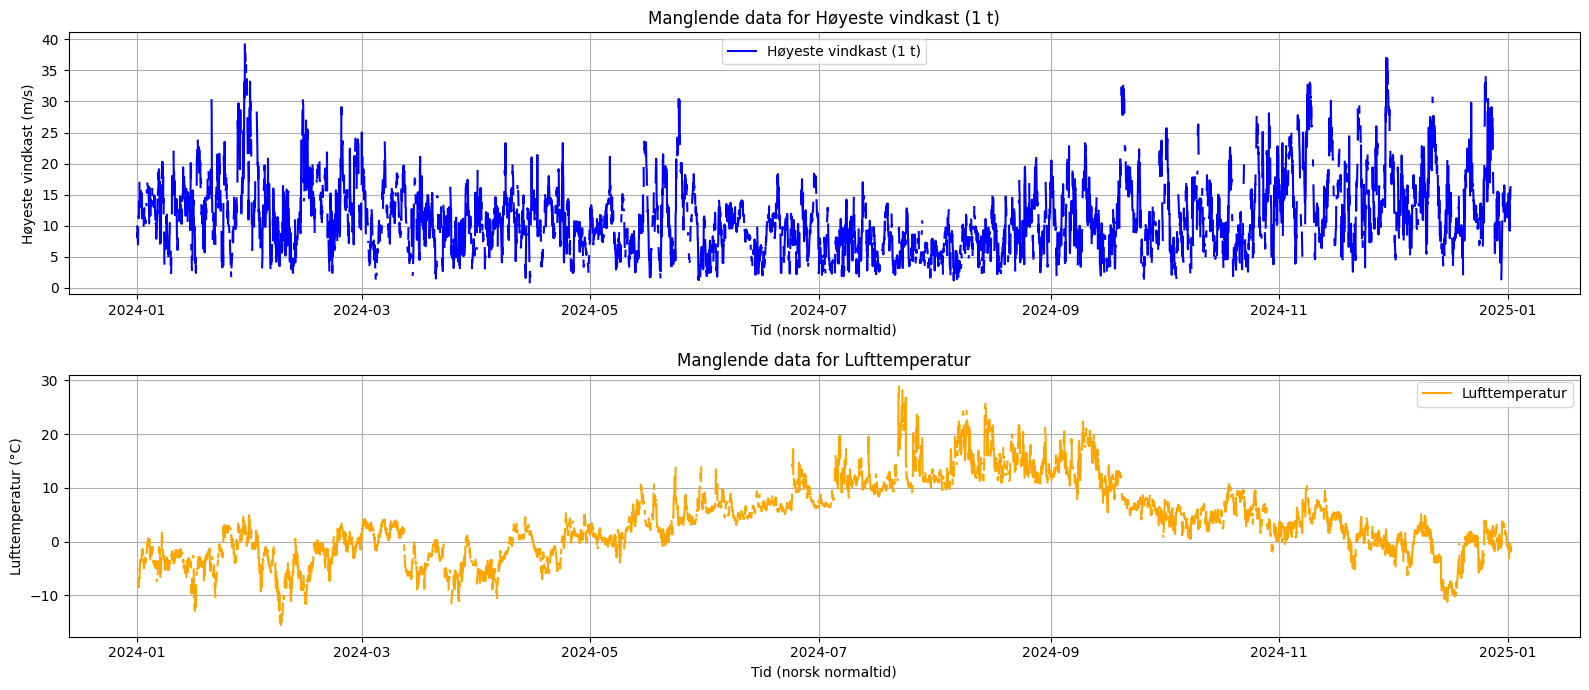

In [15]:
# Plotting av manglende data
plt.figure(figsize=(16, 7)) 
plt.subplot(2, 1, 1)
plt.plot(data[time], missing_data[vind], label="Høyeste vindkast (1 t)", color="blue")
plt.title("Manglende data for Høyeste vindkast (1 t)")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data[time], missing_data[temp], label="Lufttemperatur", color="orange")
plt.title("Manglende data for Lufttemperatur")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

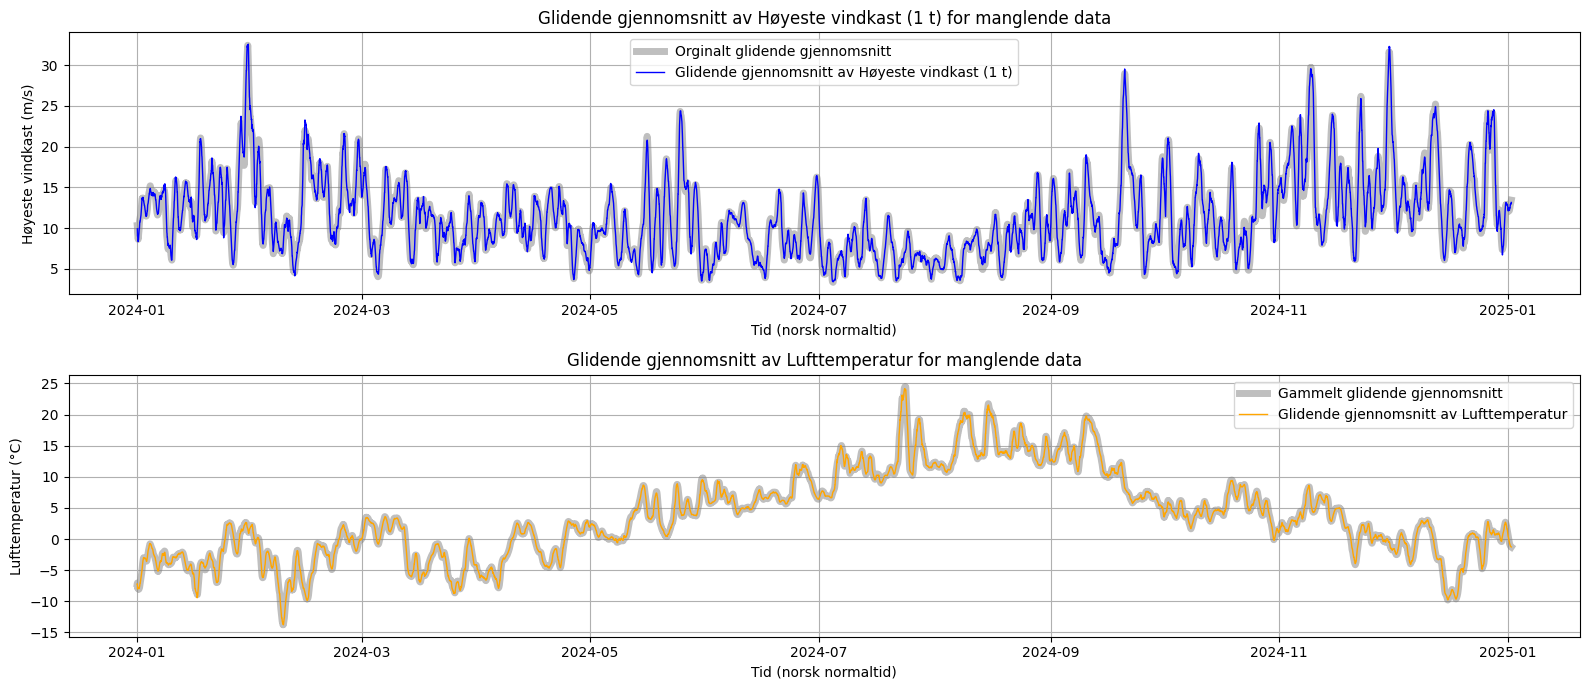

In [22]:
mva_vind = del2.moving_average(vind, window_size, df=missing_data)
mva_temp = del2.moving_average(temp, window_size, df=missing_data)

# Plotting av glidende gjennomsnitt for manglende data
plt.figure(figsize=(16, 7))
plt.subplot(2, 1, 1)
plt.plot(data[time], mv_vind, label="Orginalt glidende gjennomsnitt", color="grey", alpha=0.5, linewidth=5)
plt.plot(data[time], mva_vind, label="Glidende gjennomsnitt av Høyeste vindkast (1 t)", color="blue", linewidth=1)
plt.title("Glidende gjennomsnitt av Høyeste vindkast (1 t) for manglende data")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data[time], mv_temp, label="Gammelt glidende gjennomsnitt", color="grey", alpha=0.5, linewidth=5)
plt.plot(data[time], mva_temp, label="Glidende gjennomsnitt av Lufttemperatur", color="orange", linewidth=1)
plt.title("Glidende gjennomsnitt av Lufttemperatur for manglende data")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()